In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv('/naman/pgads/BankChurners.csv')

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
# dropping the unncessory column
data.drop('CLIENTNUM', axis=1, inplace=True)
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1, inplace=True)
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1, inplace=True)

In [6]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
data.shape

(10127, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- there is no null or missing value in the dataset

In [9]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Exploratory Data Analysis

In [10]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [11]:
data.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

#### Uni Varirate Analysis

In [12]:
data.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [13]:
size = data.Attrition_Flag.value_counts()
size

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

([<matplotlib.patches.Wedge at 0x19beb6c28b0>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customer'),
  Text(1.0066024952361898, -0.5561037822064121, 'Attrited Customer')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.9%'),
  Text(0.5689492364378463, -0.3143195290731894, '16.1%')])

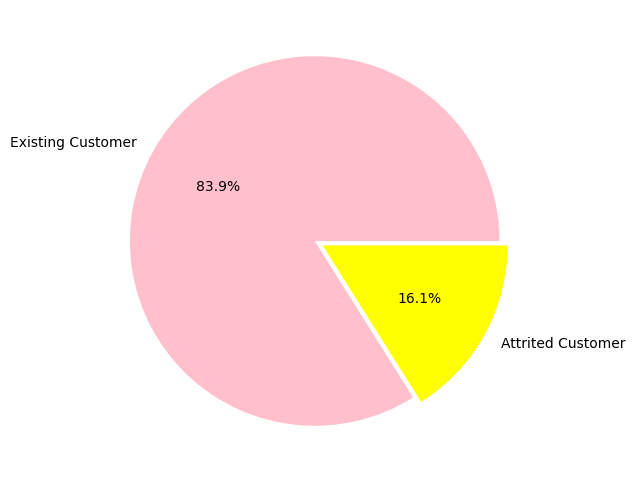

In [14]:
# checking distribution for target variable
size = data.Attrition_Flag.value_counts()
plt.figure(figsize=(10,6))
labels = ['Existing Customer', 'Attrited Customer']
explode = [.0,.05]
myColors = ['pink', 'yellow']
plt.pie(size, explode = explode, labels = labels, colors = myColors, autopct='%1.1f%%')

- By observing the target variable we came to know that there are two types of customser 'Existing Customer', 'Attrited Customer'. 
- Existing customer is 83.9% and Attrited customer is 16.1%

In [15]:
data.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

<Axes: xlabel='Contacts_Count_12_mon', ylabel='count'>

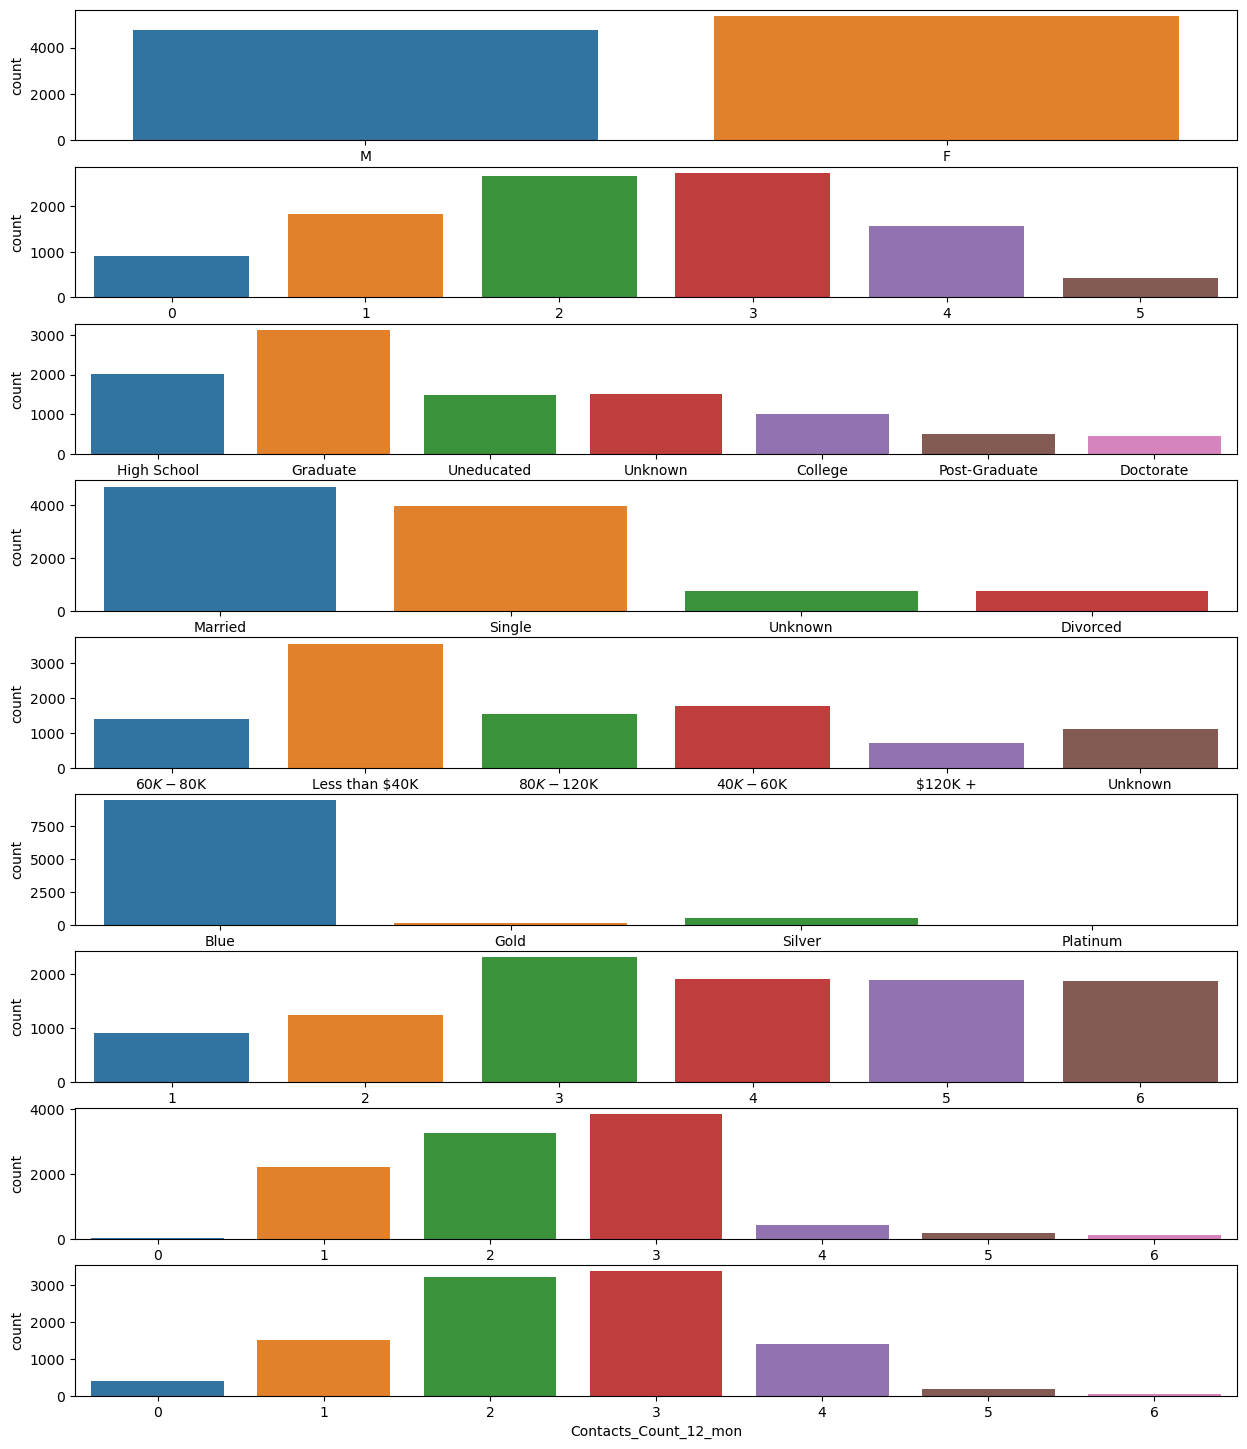

In [16]:
# checking for univariate analysis for categorical data
fig, ax = plt.subplots(9,1, figsize=(15,18))
sns.countplot(data=data, x='Gender', ax=ax[0])
sns.countplot(data=data, x='Dependent_count', ax=ax[1])
sns.countplot(data=data, x='Education_Level', ax=ax[2])
sns.countplot(data=data, x='Marital_Status', ax=ax[3])
sns.countplot(data=data, x='Income_Category', ax=ax[4])
sns.countplot(data=data, x='Card_Category', ax=ax[5])
sns.countplot(data=data, x='Total_Relationship_Count', ax=ax[6])
sns.countplot(data=data, x='Months_Inactive_12_mon', ax=ax[7])
sns.countplot(data=data, x='Contacts_Count_12_mon', ax=ax[8])

#### Insights
- There is no major difference b/w male female.
- Most number of customer are having dependent count of 2 & 3 followed by 1 & 4.
- Most of the customer are Graduate with a count over 3000,followed by high school.
- Over count of 4000 customer are married while around 3700 are single and others marital status is unknown or divorced.
- Most of the customer belongs to 'Less than dollar 40k' income category.
- Blue category is the most opted card category.
- Most Total Relationship Count is 3 i.e Total number of products held by the customer (e.g., Saving account, Car loan, Credit Card, etc.) followed by 4 & 5.
- Most of the customer are inactive from past 2-3 months.

<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Count'>

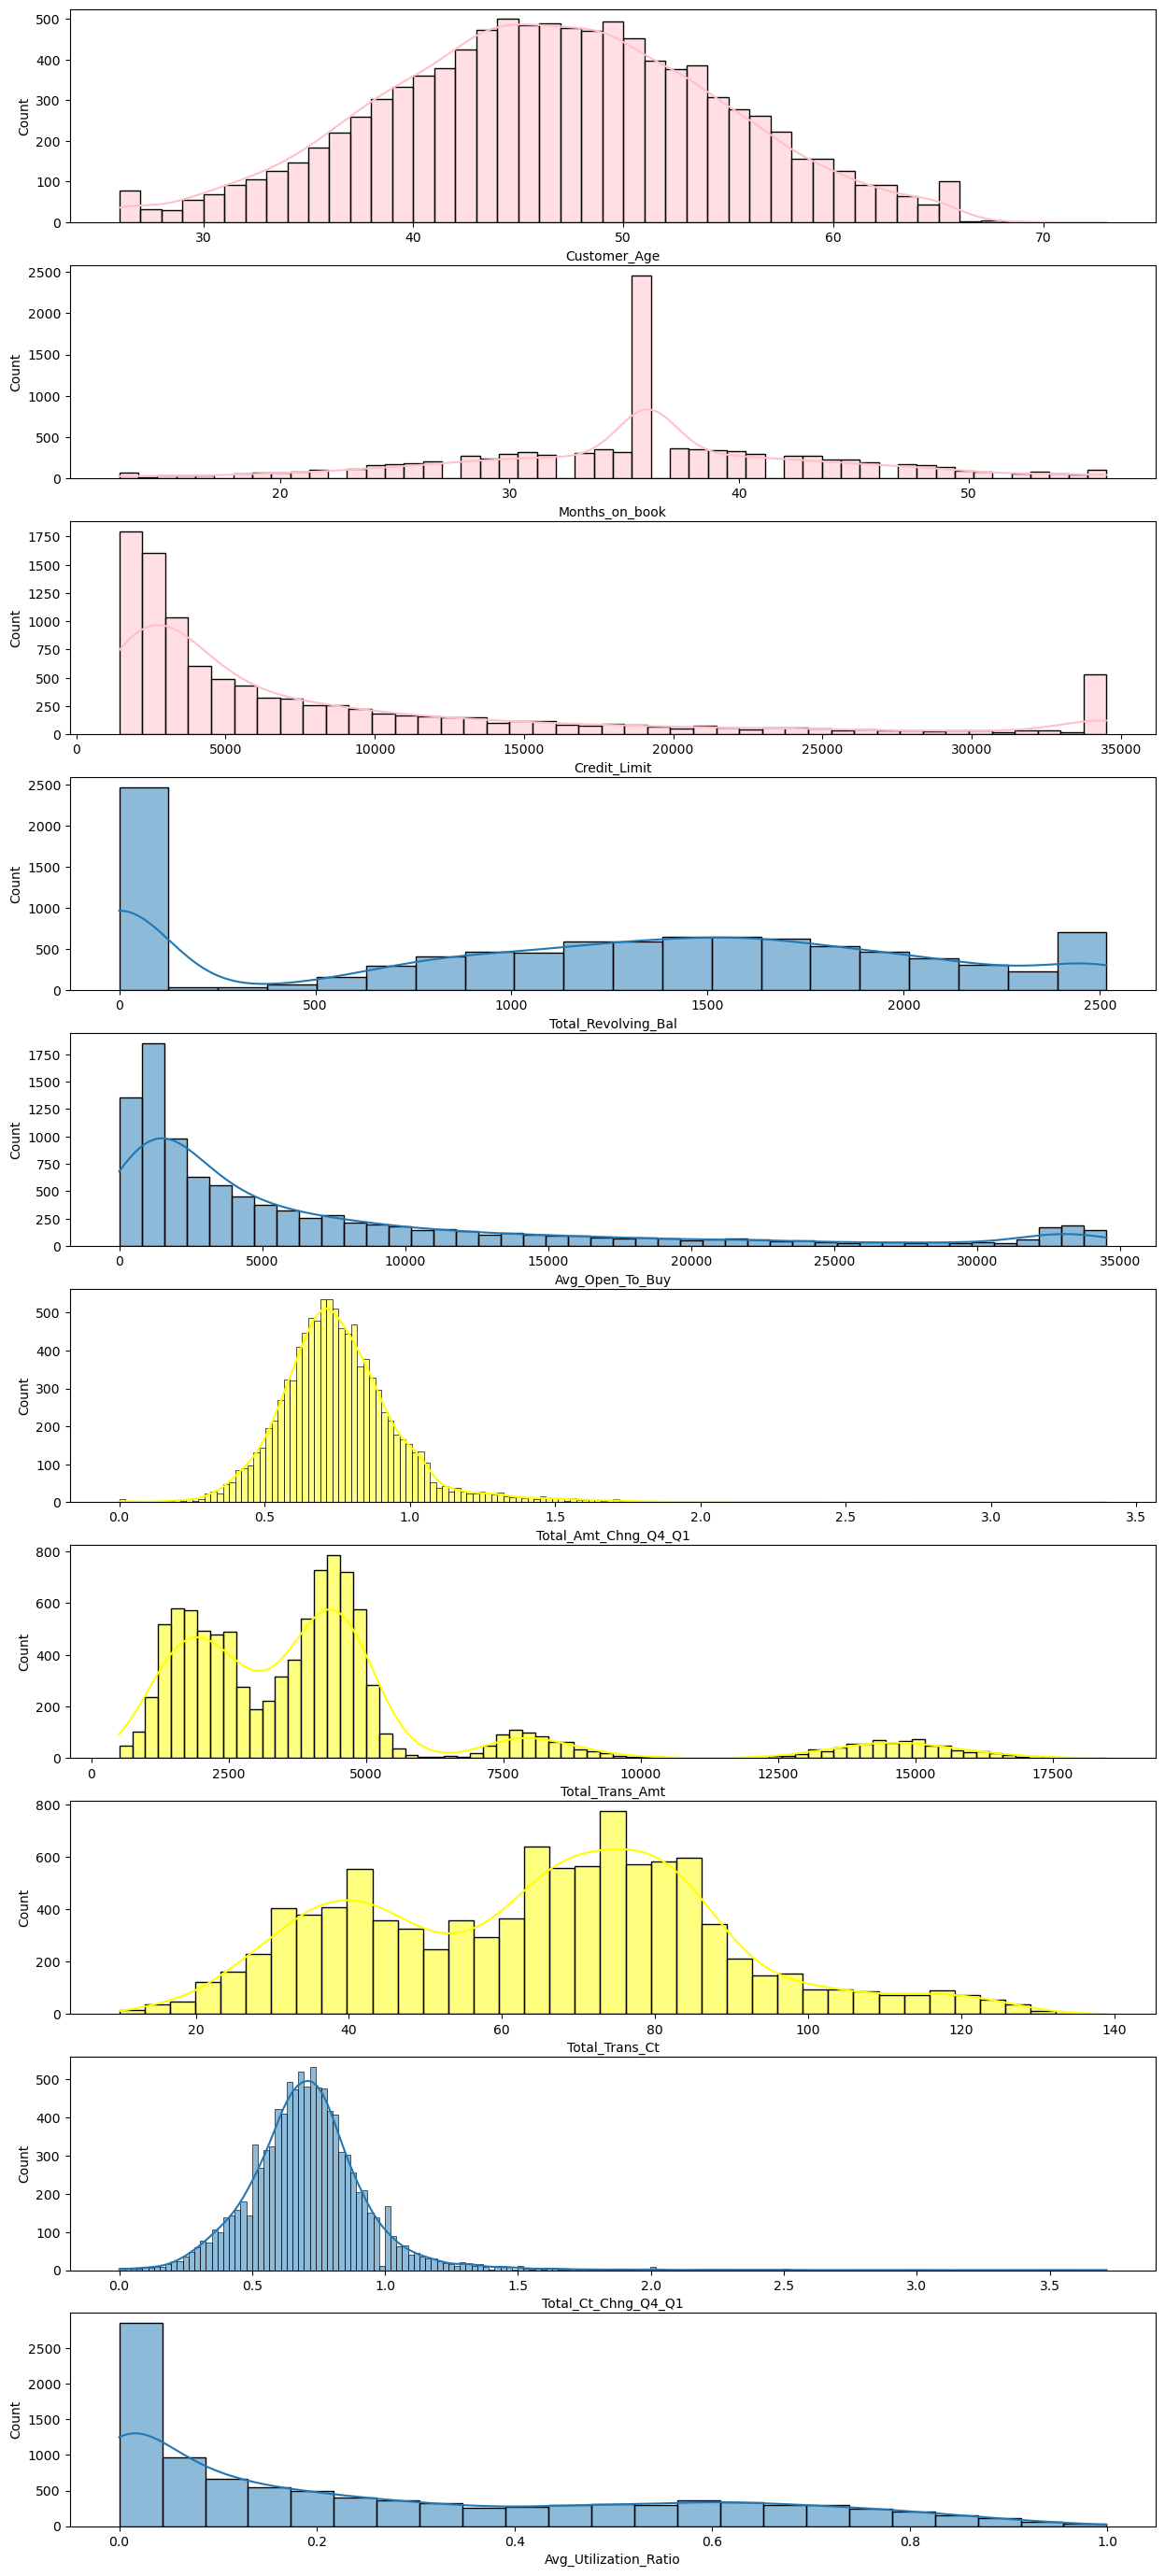

In [17]:
# checking for univariate analysis for numerical data
fig,axs=plt.subplots(10,1, figsize=(15,35))
sns.histplot(data['Customer_Age'],bins='auto',color='Pink', kde=True,ax=axs[0])
sns.histplot(data['Months_on_book'],bins='auto',color='Pink', kde=True,ax=axs[1])
sns.histplot(data['Credit_Limit'],bins='auto',color='Pink', kde=True,ax=axs[2])

sns.histplot(data['Total_Revolving_Bal'],bins='auto', kde=True,ax=axs[3])
sns.histplot(data['Avg_Open_To_Buy'],bins='auto', kde=True,ax=axs[4])

sns.histplot(data['Total_Amt_Chng_Q4_Q1'],bins='auto',color='Yellow', kde=True,ax=axs[5])
sns.histplot(data['Total_Trans_Amt'],bins='auto',color='Yellow', kde=True,ax=axs[6])
sns.histplot(data['Total_Trans_Ct'],bins='auto',color='Yellow', kde=True,ax=axs[7])

sns.histplot(data['Total_Ct_Chng_Q4_Q1'],bins='auto', kde=True,ax=axs[8])
sns.histplot(data['Avg_Utilization_Ratio'],bins='auto', kde=True,ax=axs[9])

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [19]:
data.Customer_Age.mean()

46.32596030413745

#### Insights
- Customer age distribution is +ve skewed as mean > median.
- Average Period of relationship (in months) with bank 35. and distribution is +ve skewed.
- Average customer is having a credit limit of 8631 and max limit is 34516.
- Average Total revolving balance on the credit card is 1162 and max is 2517 i.e is unpaid.

#### Bi-Variate Analaysis

In [20]:
data.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

<Axes: xlabel='Education_Level', ylabel='count'>

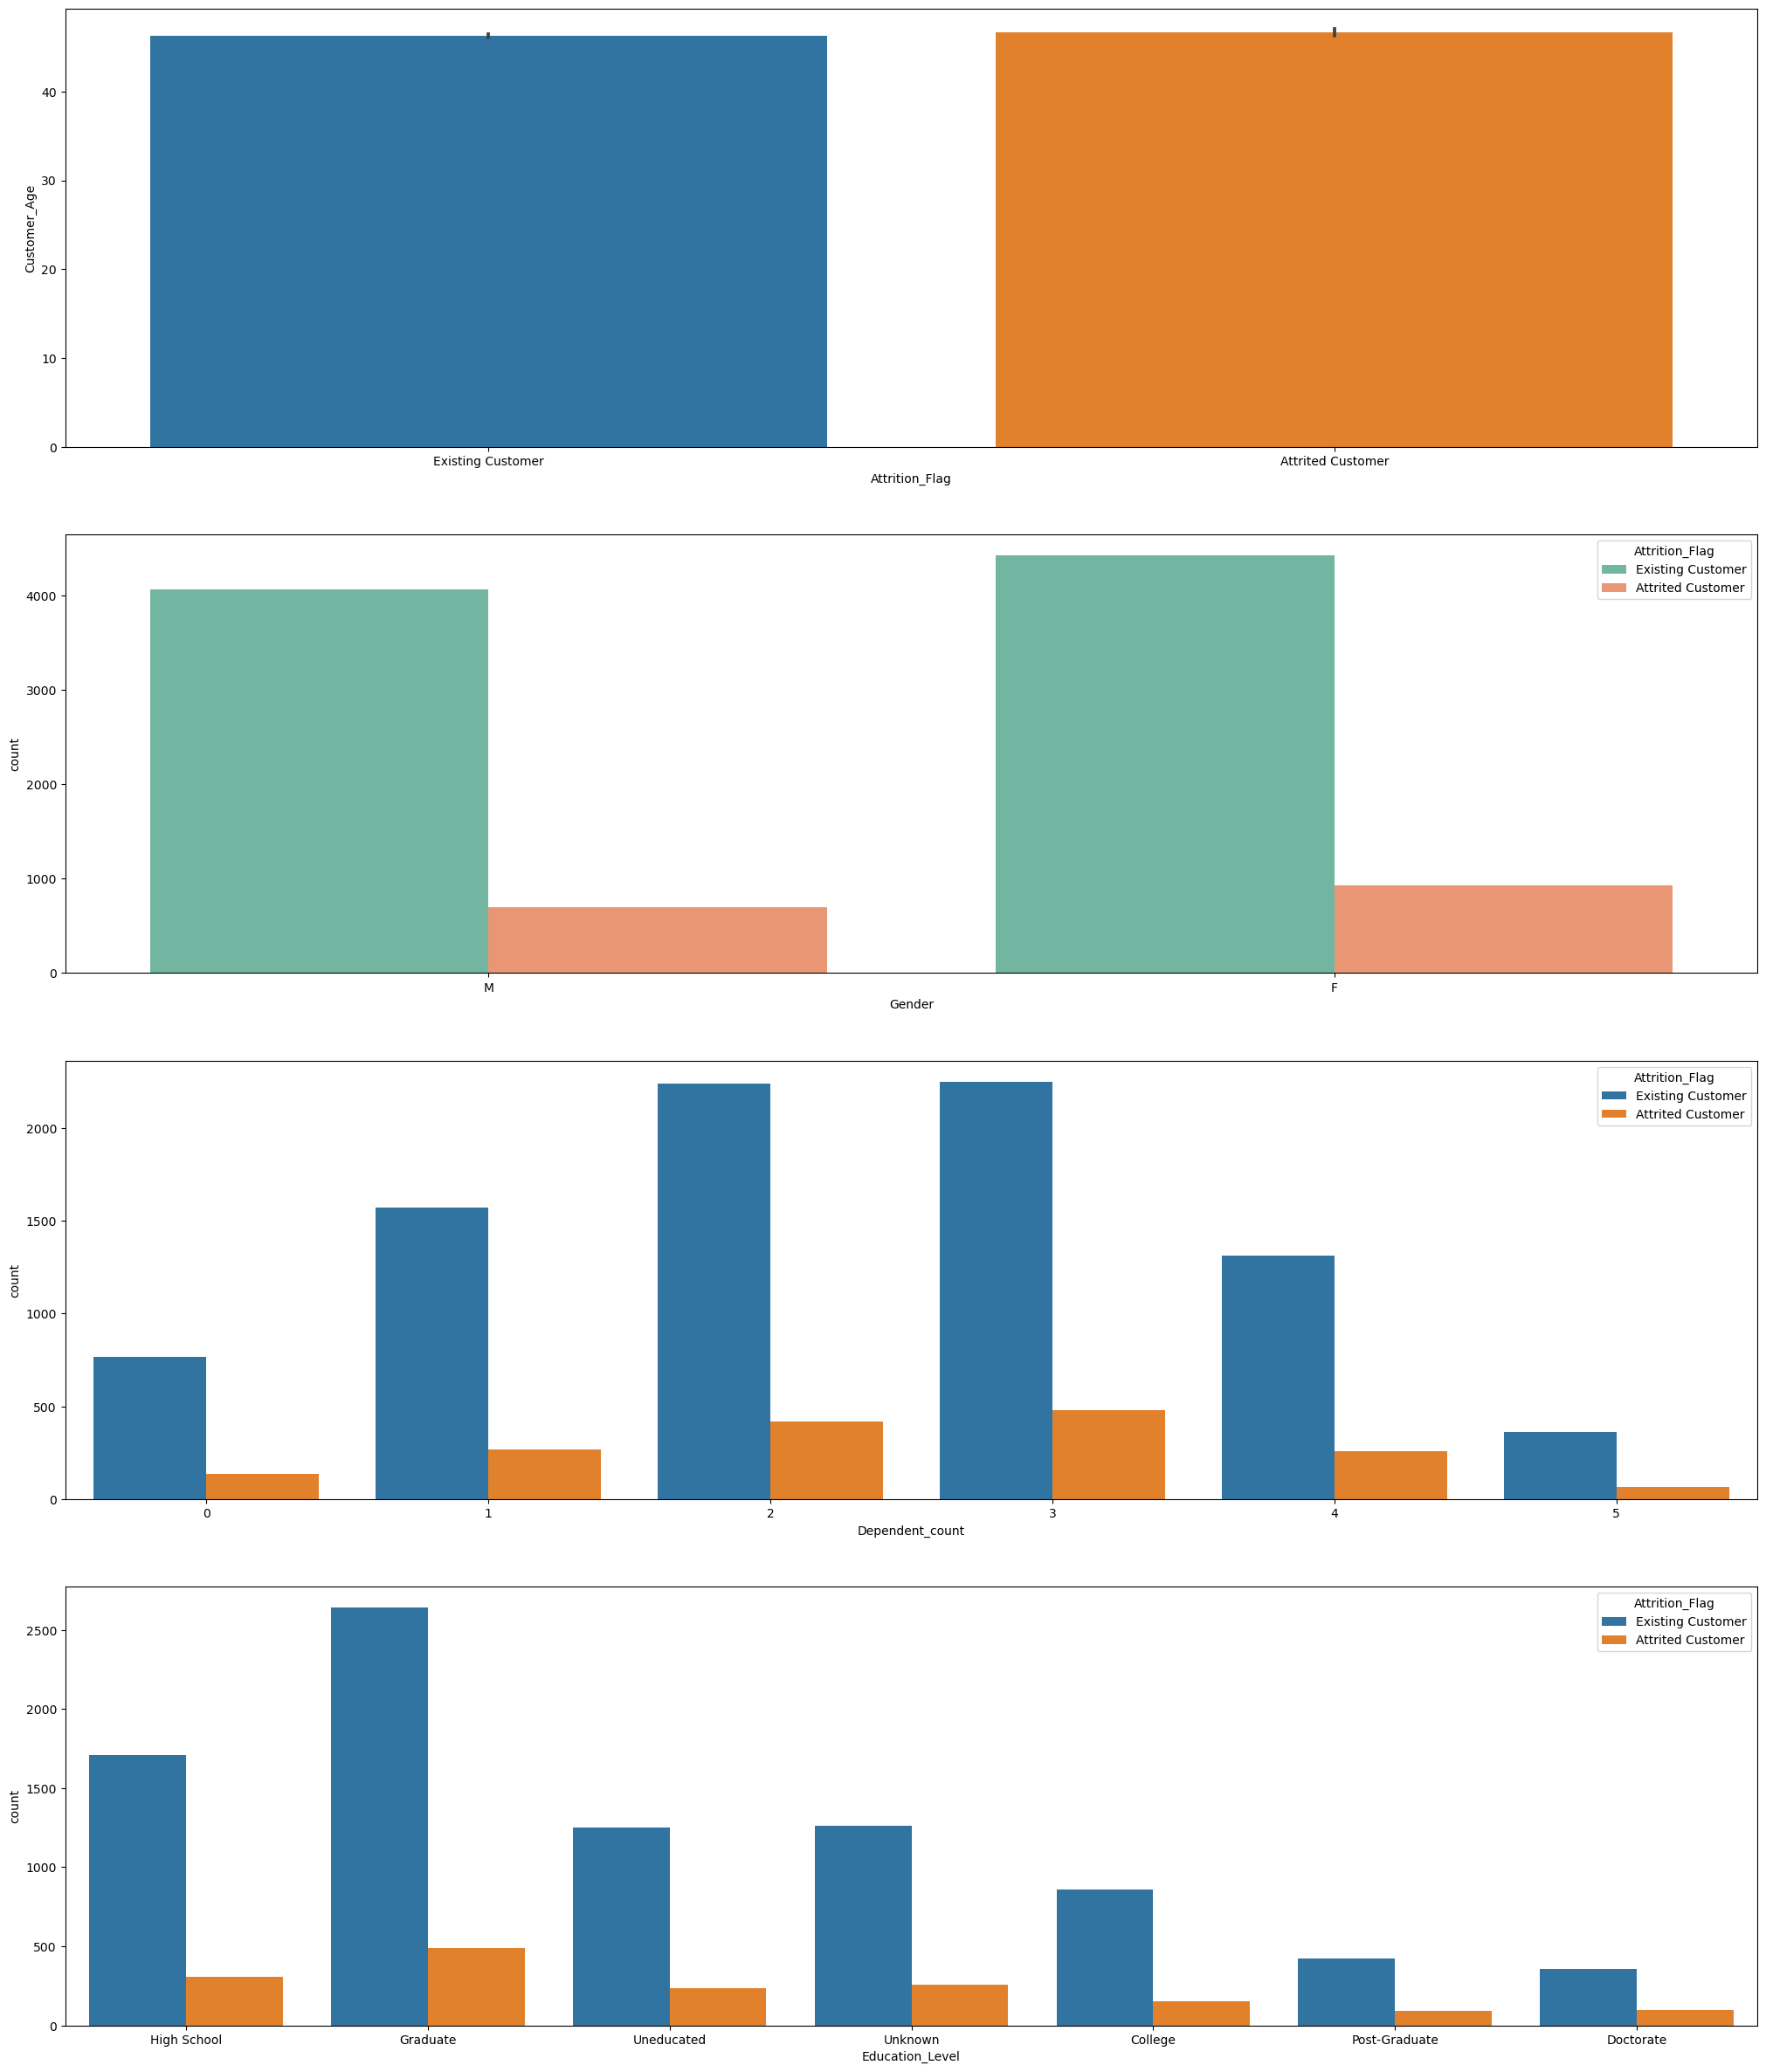

In [21]:
# checking relation b/w target variable and feature variable
fig,ax=plt.subplots(4,1,figsize=(25,30))

sns.barplot(y='Customer_Age', x='Attrition_Flag', data=data, ax=ax[0])
sns.countplot(x='Gender', hue='Attrition_Flag', data=data, palette='Set2',ax=ax[1])
sns.countplot(x='Dependent_count', hue='Attrition_Flag', data=data, ax=ax[2])
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=data,ax=ax[3])

- Both male female having equal count of Existing Customer and existing customer is more in count.
- Dependent count of 2 & 3 is more of Existing Customer than attrtied customer.
- Graduate and high school have more Existing Customer than attrited customer.
- Overall Existing customer is more than attrited customer.

<Axes: xlabel='Total_Relationship_Count', ylabel='count'>

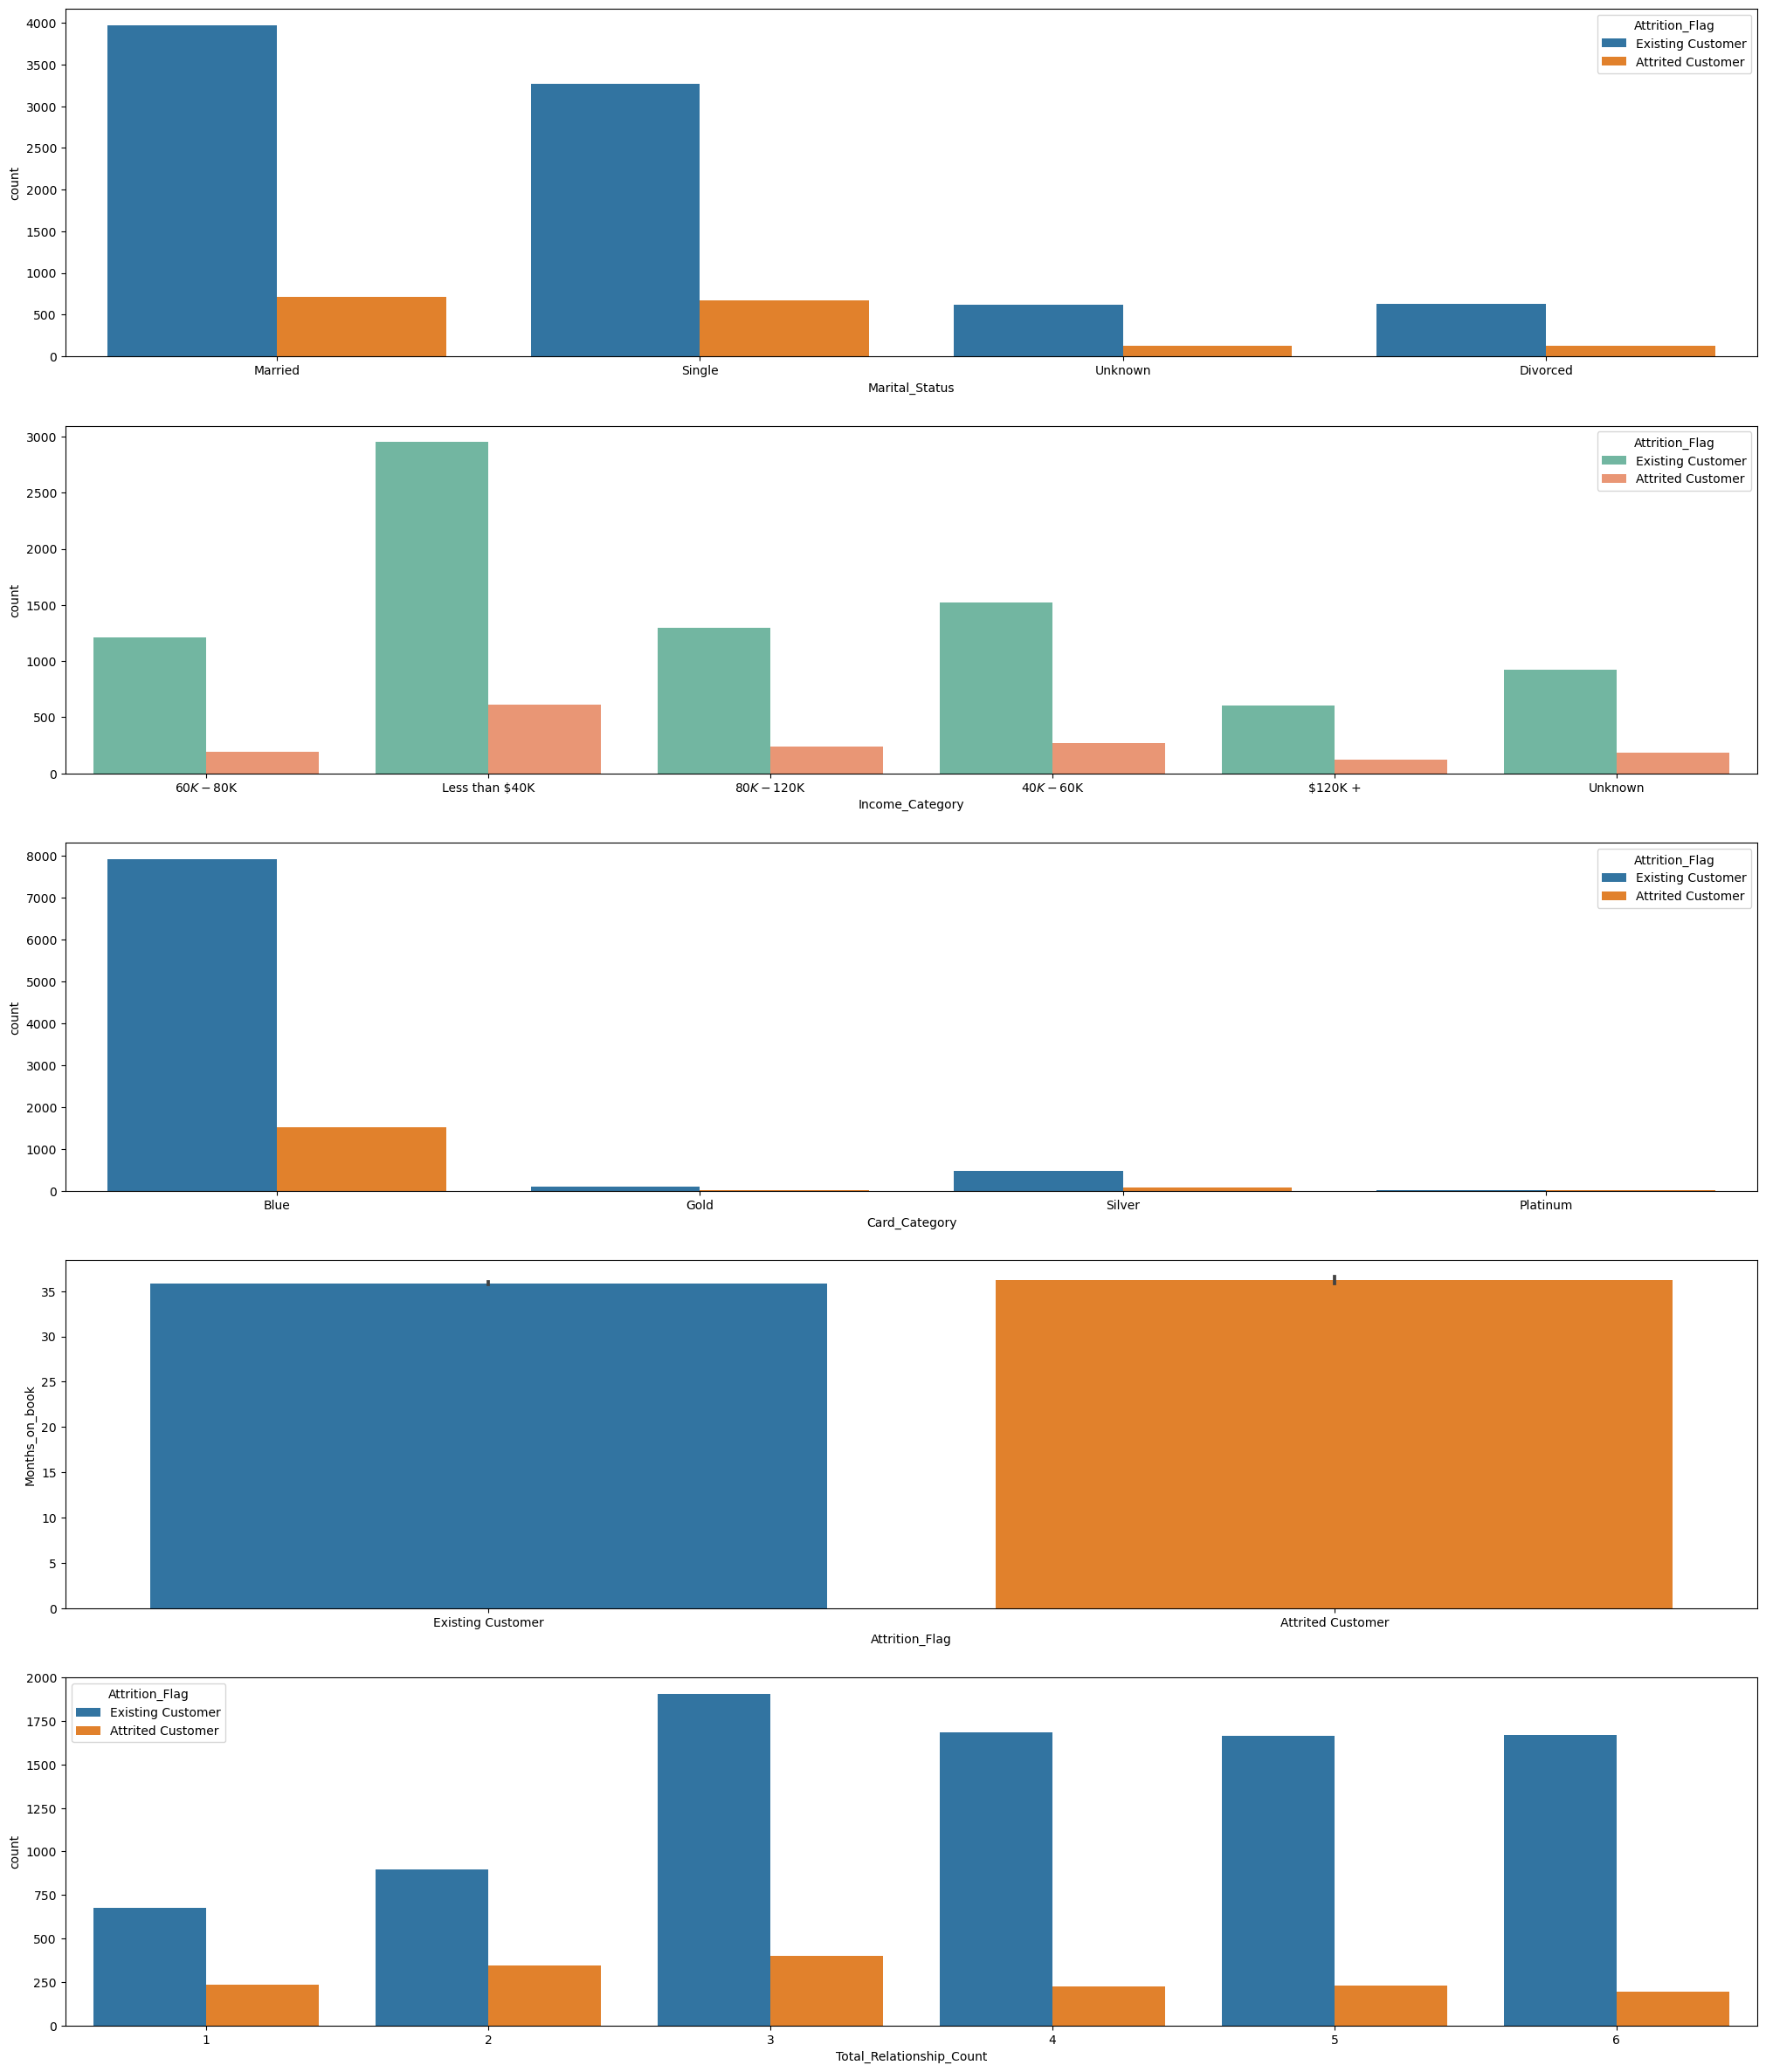

In [22]:
fig,ax=plt.subplots(5,1,figsize=(25,30))

sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=data, ax=ax[0])
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=data, palette='Set2',ax=ax[1])
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=data, ax=ax[2])
sns.barplot(y='Months_on_book', x='Attrition_Flag', data=data, ax=ax[3])
sns.countplot(x='Total_Relationship_Count', hue='Attrition_Flag', data=data, ax=ax[4])

<Axes: xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

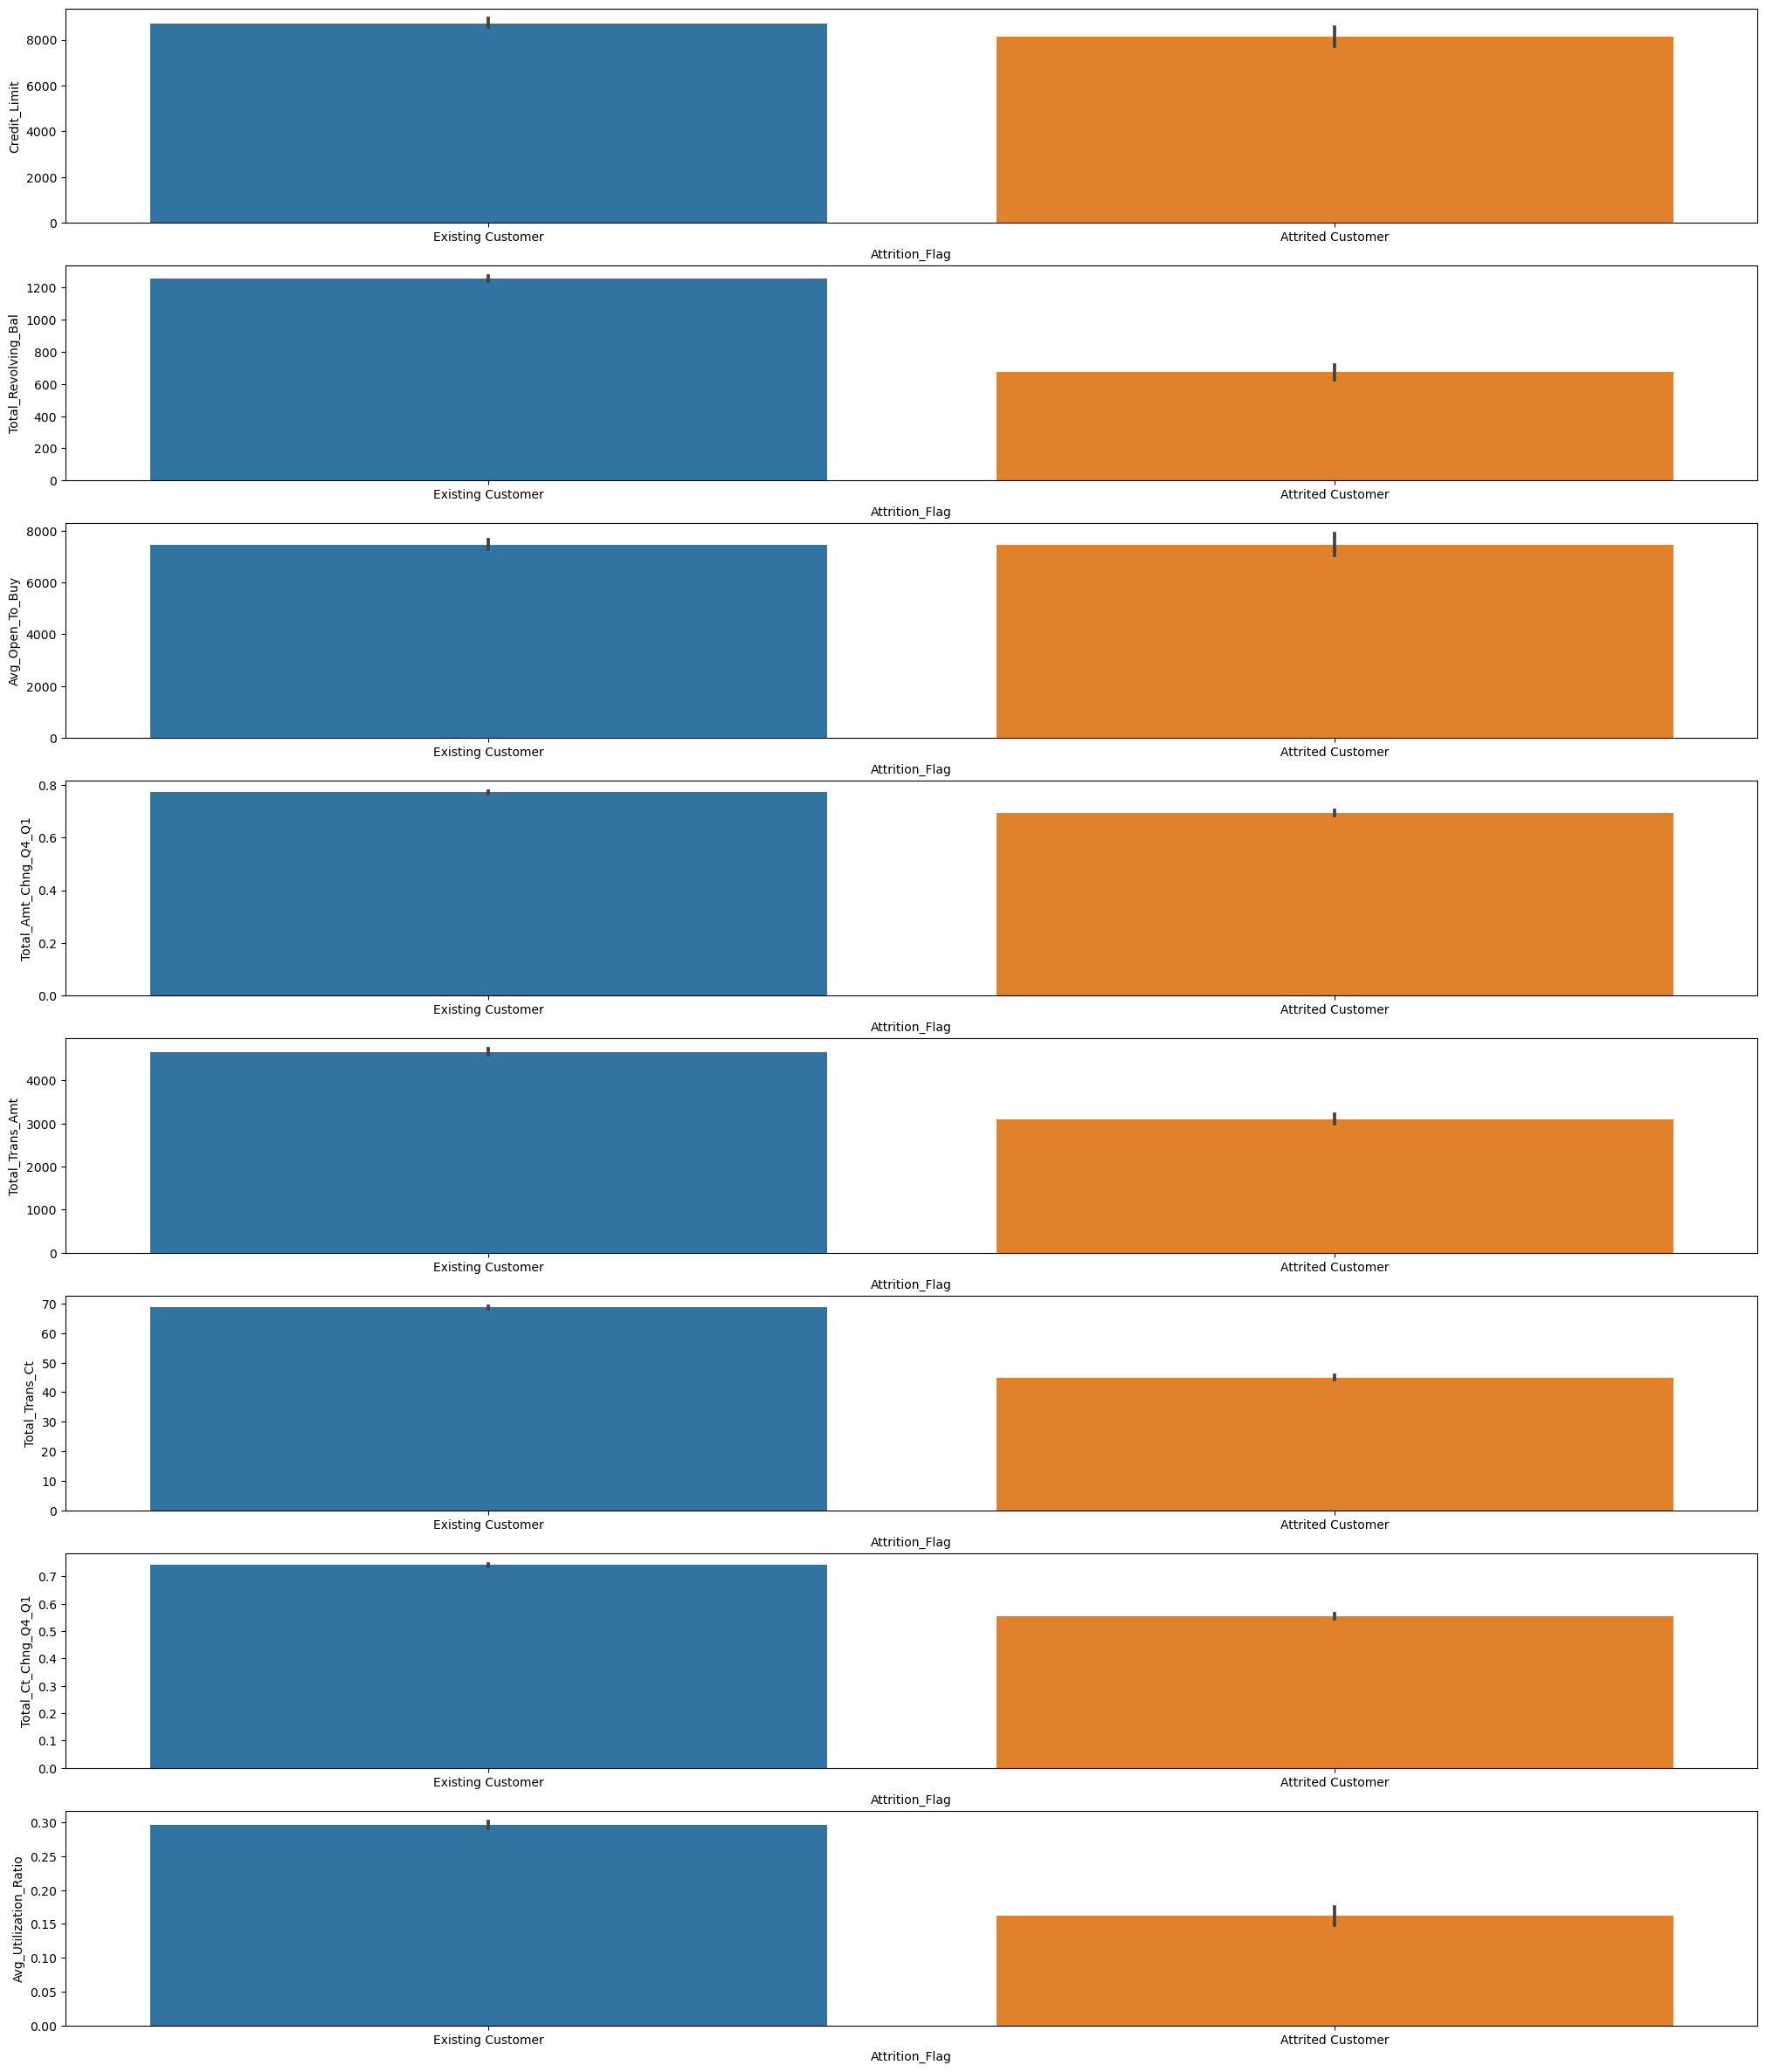

In [23]:
fig,ax=plt.subplots(8,1,figsize=(25,30))

sns.barplot(y='Credit_Limit', x='Attrition_Flag', data=data, ax=ax[0])
sns.barplot(y='Total_Revolving_Bal', x='Attrition_Flag', data=data, ax=ax[1])
sns.barplot(y='Avg_Open_To_Buy', x='Attrition_Flag', data=data, ax=ax[2])
sns.barplot(y='Total_Amt_Chng_Q4_Q1', x='Attrition_Flag', data=data, ax=ax[3])
sns.barplot(y='Total_Trans_Amt', x='Attrition_Flag', data=data, ax=ax[4])
sns.barplot(y='Total_Trans_Ct', x='Attrition_Flag', data=data, ax=ax[5])
sns.barplot(y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag', data=data, ax=ax[6])
sns.barplot(y='Avg_Utilization_Ratio', x='Attrition_Flag', data=data, ax=ax[7])

### Feature Engineering/ Scaling

In [24]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Text(0.5, 1.0, 'Avg Utilization Ratio')

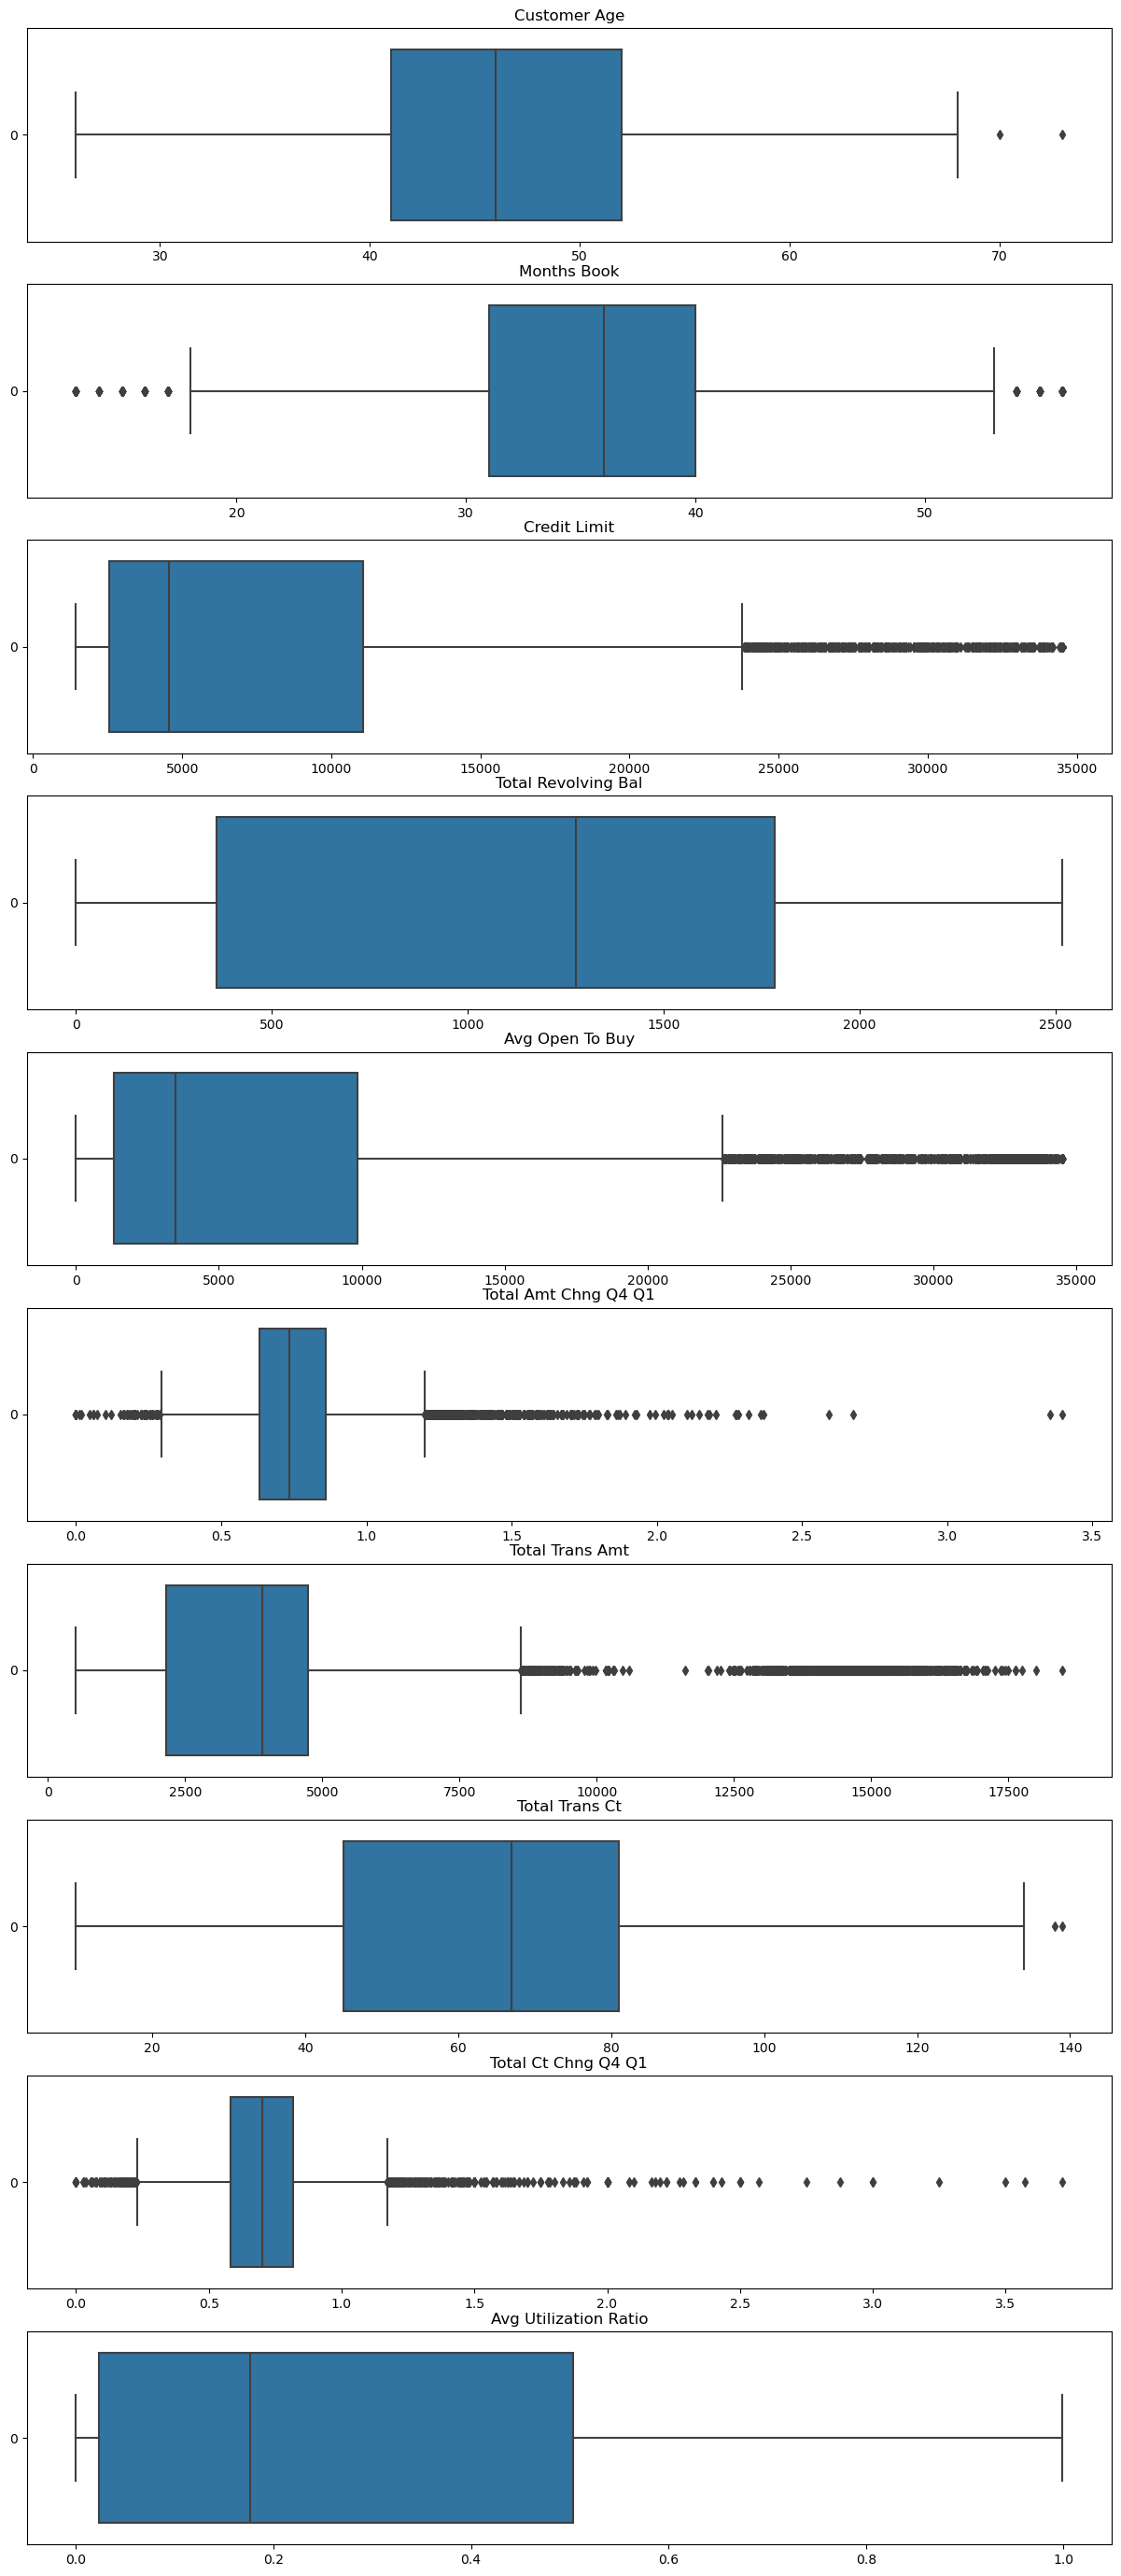

In [25]:
# detecting outliers
fig,axs=plt.subplots(10,1, figsize=(15,35))
plt1=sns.boxplot(data['Customer_Age'],orient='h',ax=axs[0])
plt2=sns.boxplot(data['Months_on_book'],orient='h',ax=axs[1])
plt3=sns.boxplot(data['Credit_Limit'],orient='h',ax=axs[2])
plt4=sns.boxplot(data['Total_Revolving_Bal'],orient='h',ax=axs[3])
plt5=sns.boxplot(data['Avg_Open_To_Buy'],orient='h',ax=axs[4])
plt6=sns.boxplot(data['Total_Amt_Chng_Q4_Q1'],orient='h',ax=axs[5])
plt7=sns.boxplot(data['Total_Trans_Amt'],orient='h',ax=axs[6])
plt8=sns.boxplot(data['Total_Trans_Ct'],orient='h',ax=axs[7])
plt9=sns.boxplot(data['Total_Ct_Chng_Q4_Q1'],orient='h',ax=axs[8])
plt10=sns.boxplot(data['Avg_Utilization_Ratio'],orient='h',ax=axs[9])
plt1.set_title('Customer Age')
plt2.set_title('Months Book')
plt3.set_title('Credit Limit')
plt4.set_title('Total Revolving Bal')
plt5.set_title('Avg Open To Buy')
plt6.set_title('Total Amt Chng Q4 Q1')
plt7.set_title('Total Trans Amt')
plt8.set_title('Total Trans Ct')
plt9.set_title('Total Ct Chng Q4 Q1')
plt10.set_title('Avg Utilization Ratio')

In [26]:
cols = ['Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1']
for col in cols:
    q3 = data[col].quantile(0.75)
    q1 = data[col].quantile(0.25)

    iqr = q3 - q1

    lower = q1 - 3 * iqr
    upper = q3 + 3 * iqr
    data = data[(data[col] >= lower) & (data[col] <= upper)]

In [27]:
data = data.reset_index(drop=True)

Text(0.5, 1.0, 'Total Ct Chng Q4 Q1')

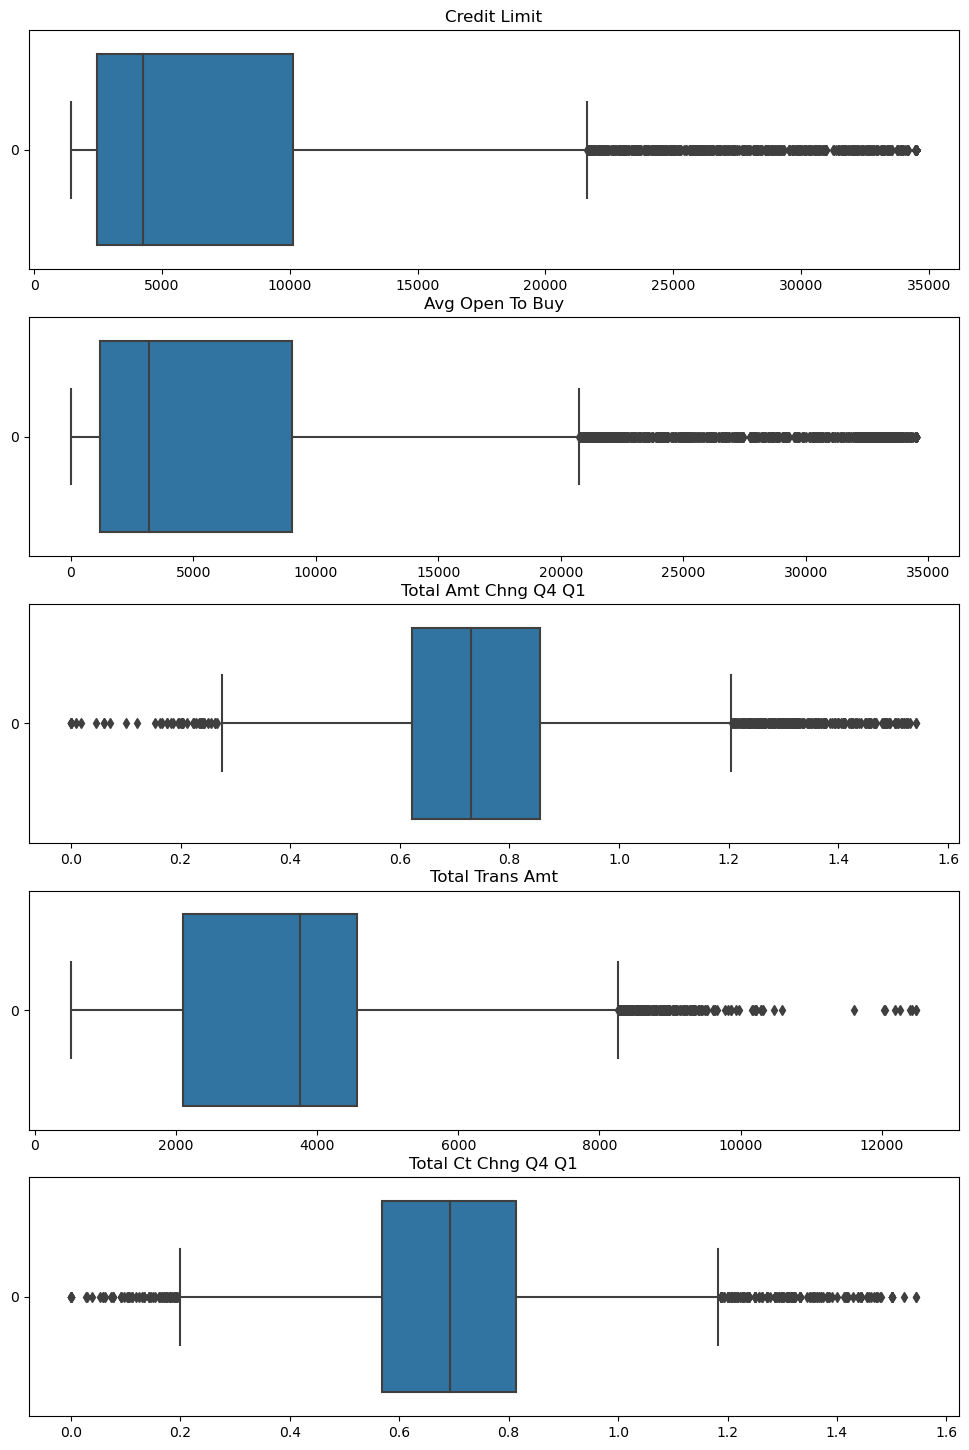

In [28]:
# detecting outliers
fig,axs=plt.subplots(5,1, figsize=(12,18))
plt3=sns.boxplot(data['Credit_Limit'],orient='h',ax=axs[0])
plt5=sns.boxplot(data['Avg_Open_To_Buy'],orient='h',ax=axs[1])
plt6=sns.boxplot(data['Total_Amt_Chng_Q4_Q1'],orient='h',ax=axs[2])
plt7=sns.boxplot(data['Total_Trans_Amt'],orient='h',ax=axs[3])
plt9=sns.boxplot(data['Total_Ct_Chng_Q4_Q1'],orient='h',ax=axs[4])
plt3.set_title('Credit Limit')
plt5.set_title('Avg Open To Buy')
plt6.set_title('Total Amt Chng Q4 Q1')
plt7.set_title('Total Trans Amt')
plt9.set_title('Total Ct Chng Q4 Q1')


#### Label Encoding 

In [29]:
# converting numerical data into categorical value using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = ['Attrition_Flag','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
for i in c:
    data[i] = le.fit_transform(data[i])

In [30]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,44,1,2,2,1,1,0,36,2,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
1,1,48,1,2,2,2,3,0,36,5,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
2,1,42,1,5,5,3,0,0,31,4,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
3,1,65,1,1,6,1,1,0,54,5,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
4,1,57,0,2,2,1,4,0,48,4,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279


#### chi2 test for independence (categorical data only)
- Null hypothesis: variables are independent to each other
- Alternate hypothesis: variables are dependent

In [31]:
from sklearn.feature_selection import chi2
x1 = data.drop('Attrition_Flag',axis=1)
y1 = data.Attrition_Flag

In [32]:
# returns f score and p value
f_score = chi2(x1, y1)
f_score

(array([2.49232776e+00, 3.72456709e+00, 2.04270566e+00, 5.64053778e-01,
        1.06444173e+00, 1.22716554e+00, 4.66302974e+00, 1.80674115e+00,
        2.75204940e+02, 9.72178684e+01, 1.95518761e+02, 9.98501773e+02,
        3.77473140e+05, 4.53968299e+04, 7.34564860e+00, 1.50274501e+05,
        8.95497959e+03, 5.91679877e+01, 9.87195568e+01]),
 array([1.14402409e-001, 5.36175251e-002, 1.52937408e-001, 4.52631509e-001,
        3.02204311e-001, 2.67958983e-001, 3.08187642e-002, 1.78899654e-001,
        8.32826351e-062, 6.21036789e-023, 1.98514742e-044, 3.80125228e-219,
        0.00000000e+000, 0.00000000e+000, 6.72252735e-003, 0.00000000e+000,
        0.00000000e+000, 1.44769923e-014, 2.90914924e-023]))

In [33]:
p_value = pd.Series(f_score[1], index=x1.columns)
p_value

Customer_Age                 1.144024e-01
Gender                       5.361753e-02
Dependent_count              1.529374e-01
Education_Level              4.526315e-01
Marital_Status               3.022043e-01
Income_Category              2.679590e-01
Card_Category                3.081876e-02
Months_on_book               1.788997e-01
Total_Relationship_Count     8.328264e-62
Months_Inactive_12_mon       6.210368e-23
Contacts_Count_12_mon        1.985147e-44
Credit_Limit                3.801252e-219
Total_Revolving_Bal          0.000000e+00
Avg_Open_To_Buy              0.000000e+00
Total_Amt_Chng_Q4_Q1         6.722527e-03
Total_Trans_Amt              0.000000e+00
Total_Trans_Ct               0.000000e+00
Total_Ct_Chng_Q4_Q1          1.447699e-14
Avg_Utilization_Ratio        2.909149e-23
dtype: float64

In [34]:
irr_cols = []
for x in p_value.index:
    if p_value[x]<=0.05:
        print(x,':- Reject Null Hypothesis')
    else:
        print(x, ':- Accept Null Hypothesis')
        irr_cols.append(x)

Customer_Age :- Accept Null Hypothesis
Gender :- Accept Null Hypothesis
Dependent_count :- Accept Null Hypothesis
Education_Level :- Accept Null Hypothesis
Marital_Status :- Accept Null Hypothesis
Income_Category :- Accept Null Hypothesis
Card_Category :- Reject Null Hypothesis
Months_on_book :- Accept Null Hypothesis
Total_Relationship_Count :- Reject Null Hypothesis
Months_Inactive_12_mon :- Reject Null Hypothesis
Contacts_Count_12_mon :- Reject Null Hypothesis
Credit_Limit :- Reject Null Hypothesis
Total_Revolving_Bal :- Reject Null Hypothesis
Avg_Open_To_Buy :- Reject Null Hypothesis
Total_Amt_Chng_Q4_Q1 :- Reject Null Hypothesis
Total_Trans_Amt :- Reject Null Hypothesis
Total_Trans_Ct :- Reject Null Hypothesis
Total_Ct_Chng_Q4_Q1 :- Reject Null Hypothesis
Avg_Utilization_Ratio :- Reject Null Hypothesis


In [35]:
# dropping the irrevelant columns 
data.drop(irr_cols, axis=1, inplace=True)

In [36]:
data.head()

,Attrition_Flag,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,0,2,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
1,1,0,5,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
2,1,0,4,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
3,1,0,5,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
4,1,0,4,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279


#### So out of 22 feature the found 14 are dependent on target variable using chi-square test, so we drop the irrelevant columns.

### Spliting the data

In [37]:
x = data.drop('Attrition_Flag', axis=1)
y = data.Attrition_Flag

In [38]:
# split the train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [39]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((7392, 12), (1848, 12), (1848,), (7392,))

## Logistic Regression
### Model Building

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [41]:
# Making a Prediction
y_pred = log_reg.predict(x_test)

### Model Evaluation

In [42]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)*100
roc_auc_score = roc_auc_score(y_test, y_pred)*100
f1score = f1_score(y_test, y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 89.3939
roc_auc_score = 75.8134
F1 Score = 93.7699


In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 177,  145],
       [  51, 1475]], dtype=int64)

<Axes: >

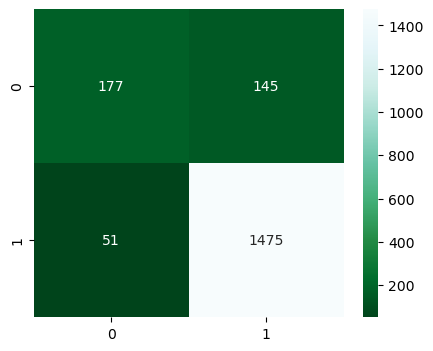

In [44]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot = True, cmap = 'BuGn_r', fmt='d')

#### Balancing the data using SMOTE

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [46]:
sm = SMOTE(random_state=42)
X_sm,Y_sm = sm.fit_resample(x,y)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm,Y_sm, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train, Y_train)

LogisticRegression()

In [49]:
Y_pred = log_reg.predict(X_test)

In [50]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)*100
roc_auc_score = roc_auc_score(Y_test, Y_pred)*100
f1score = f1_score(Y_test, Y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 81.6869
roc_auc_score = 81.605
F1 Score = 82.606


Certainly! Here's a concise summary of when to use each metric for Logistic Regression:

1. **Precision and Recall**:
   - **Use**: Crucial for binary classification with potential class imbalance or varying costs of false positives and false negatives.
   
   
2. **F1-Score**:
   - **Use**: Balances between precision and recall. Suitable when false positives and false negatives have differing impacts.


3. **ROC-AUC**:
   - **Use**: Evaluates Logistic Regression's ability to distinguish between positive and negative classes. Particularly useful with class imbalance scenarios.


## Decision Tree
### Model Building

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [52]:
# Fit the training data
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [53]:
Y_pred = dt.predict(X_test)

### Model Evaluation

In [54]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)*100
roc_auc_score = roc_auc_score(Y_test, Y_pred)*100
f1score = f1_score(Y_test, Y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 94.5848
roc_auc_score = 94.6189
F1 Score = 94.7335


In [55]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1464
           1       0.96      0.94      0.95      1583

    accuracy                           0.95      3047
   macro avg       0.95      0.95      0.95      3047
weighted avg       0.95      0.95      0.95      3047



<Axes: >

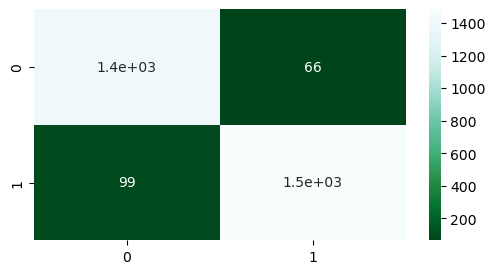

In [56]:
# ploting the confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True, cmap='BuGn_r')


1. **Accuracy**:
   - **Use**: Suitable when classes are balanced and misclassification costs are relatively equal. It's a good starting point for evaluating Decision Trees.

 
2. **F1-Score**:
   - **Use**: Balances between precision and recall. Suitable when false positives and false negatives have differing impacts.


3. **Precision and Recall**:
   - **Use**: Remains relevant for Decision Trees, particularly if there are specific consequences for false positives and false negatives.

These metrics help in assessing different aspects of a Decision Tree's performance, depending on the specific characteristics of the data and the problem at hand.

## Random Forest Classifier
### Model Building

In [57]:
from sklearn.ensemble import RandomForestClassifier

# creating the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)

In [58]:
# training the classifier on training data
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [59]:
Y_pred = rf_classifier.predict(X_test)

### Model Evaluation

In [60]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)*100
roc_auc_score = roc_auc_score(Y_test, Y_pred)*100
f1score = f1_score(Y_test, Y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 97.3416
roc_auc_score = 97.3774
F1 Score = 97.4163


In [61]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1464
           1       0.98      0.96      0.97      1583

    accuracy                           0.97      3047
   macro avg       0.97      0.97      0.97      3047
weighted avg       0.97      0.97      0.97      3047



<Axes: >

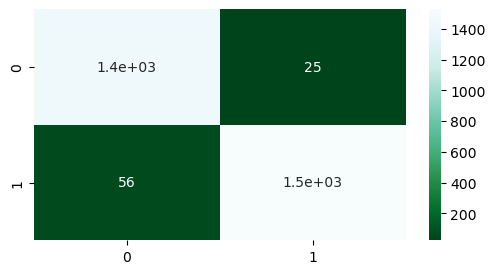

In [62]:
# ploting the confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True, cmap='BuGn_r')


1. **Accuracy**:
   - **Use**: Gives an overall measure of correct predictions. Useful as a starting point for model evaluation. However, be cautious with imbalanced data.
   

2. **Precision and Recall**:
   - **Use**: Provides insights into the trade-offs between false positives and false negatives. Especially important if there are specific consequences for these types of errors.
   

3. **ROC-AUC**:
   - **Use**: Assesses how well the Random Forest distinguishes between classes. Useful for evaluating classification performance.



## Results analysis

a). Which of the 3 models would yourecommend for deployment in the real-world?
##### Among the 3 model I would recommend ***Random Forest Classifier*** for the deployment in the real world as the f1 auc score is the highest than other model.
1. Accuracy = 97.3416
2. roc_auc_score = 97.3774
3. F1 Score = 97.4163***  


b). Is any model underfitting? If yes, what could be the possible reasons?
##### None of the models are showing signs of underfitting, as they are all achieving very high accuracy scores. Underfitting typically results in poor performance on both the training and test/validation data.